In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
center_a_coordinate = (385, 410)
center_d_coordinate = (255.5, 255.5)

# actual pixel position measured from product image
pixel_xa_plus = np.array([482, 517, 565, 581, 620, 629, 664, 673, 701, 708, 732])
pixel_xa_minus = np.array([291, 256, 208, 187, 153, 139, 106, 92, 68, 57, 38])
pixel_ya_plus = np.array([317, 272, 235, 210, 181, 159, 136, 119, 97, 83, 68])
pixel_ya_minus = np.array([500, 549, 584, 613, 640, 663, 686, 701, 722, 736, 753])
# pixel position measure from design image
pixel_d_minus = np.array([190, 154, 128, 107, 88, 71, 55, 41, 27, 15, 5])

img_a_array = np.moveaxis(np.array(Image.open('./aperture/product/result_10_measure.png')), 0, 1)
img_d_array = np.moveaxis(np.array(Image.open('./aperture/product/f32f45_angular8_measure.bmp')), 0, 1)
#micron_per_pixel_x = 168.875 * 0.4 /(pixel_xa_minus[1] - pixel_xa_minus[2])
micron_per_pixel_y = 1015.427 /686
#print(micron_per_pixel_x)
print(micron_per_pixel_y)
micron_per_pixel = micron_per_pixel_y
# print(micron_per_pixel)
micron_per_design_pixel = 2
rxa_minus = (center_a_coordinate[0] - pixel_xa_minus)*micron_per_pixel
rxa_plus = (pixel_xa_plus - center_a_coordinate[0])*micron_per_pixel
rya_minus = (pixel_ya_minus - center_a_coordinate[1])*micron_per_pixel
rya_plus = (center_a_coordinate[1] - pixel_ya_plus)*micron_per_pixel
rd = (center_d_coordinate[0] - pixel_d_minus) * micron_per_design_pixel
print('/////////////////////////')
print(f'designed markers radial location: {rd} μm')
print(f'marker radial position difference (actual - designed)')
print(f'-x axes: {np.round(rxa_minus-rd, 2)} μm')
print(f'+x axes: {np.round(rxa_plus-rd, 2)} μm')
print(f'-y axes: {np.round(rya_minus-rd, 2)} μm')
print(f'+y axes: {np.round(rya_plus-rd, 2)} μm')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1.4802142857142857
/////////////////////////
designed markers radial location: [131. 203. 255. 297. 335. 369. 401. 429. 457. 481. 501.] μm
marker radial position difference (actual - designed)
-x axes: [  8.14 -12.05   7.    -3.92   8.41  -4.87  11.98   4.7   12.23   4.51
  12.63] μm
+x axes: [12.58 -7.61 11.44 -6.88 12.85 -7.83 11.98 -2.7  10.75 -2.89 12.63] μm
-y axes: [2.22 2.75 2.56 3.48 5.45 5.49 7.54 1.74 4.83 1.55 6.71] μm
+y axes: [ 6.66  1.27  4.04 -0.96  3.97  2.53  4.58  1.74  6.31  3.03  5.23] μm


In [11]:
tmp_x = (rxa_minus-rd + rxa_plus-rd)/2
tmp_y = (rya_minus-rd + rya_plus-rd)/2
avg_x = (tmp_x[0] - tmp_x[1] + tmp_x[2] - tmp_x[3] + tmp_x[4] - tmp_x[5] + tmp_x[6] - tmp_x[7] + tmp_x[8] - tmp_x[9])/5
avg_y = (tmp_y[0] - tmp_y[1] + tmp_y[2] - tmp_y[3] + tmp_y[4] - tmp_y[5] + tmp_y[6] - tmp_y[7] + tmp_y[8] - tmp_y[9])/5

In [12]:
print(f'avg x margin {avg_x:.2f} μm')
print(f'avg y margin {avg_y:.2f} μm')
print(f'avg x pen-width {(avg_x+10):.2f} μm')
print(f'avg y pen-width {(avg_y+10):.2f} μm')

avg x margin 14.69 μm
avg y margin 2.55 μm
avg x pen-width 24.69 μm
avg y pen-width 12.55 μm


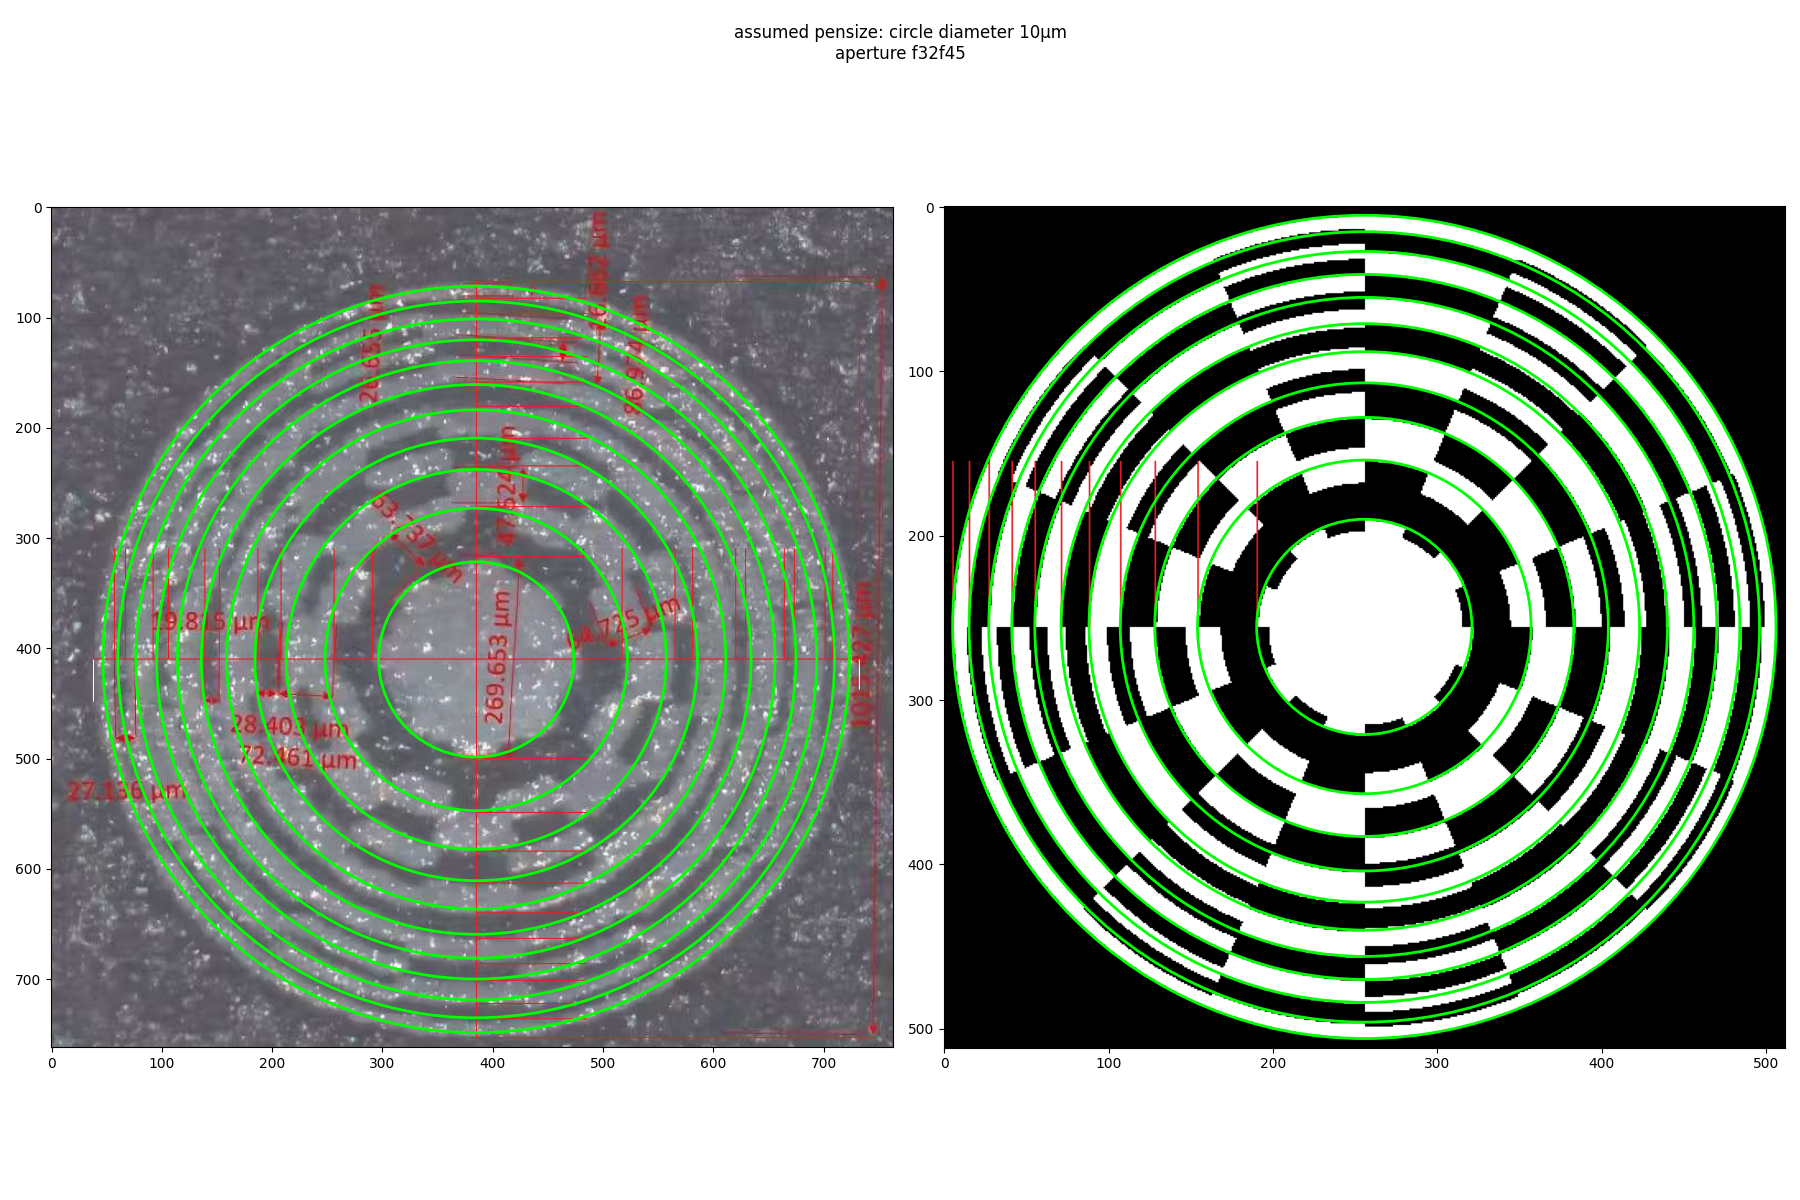

In [17]:
layout = [[0, 1]]
fig, ax = plt.subplot_mosaic(layout, figsize=(18, 12))
fig.suptitle('assumed pensize: circle diameter 10μm\naperture f32f45')
ax[0].imshow(np.moveaxis(img_a_array, 0, 1))
ax[1].imshow(np.moveaxis(img_d_array, 0, 1), cmap='grey')
for r in rd:
    circle = patches.Circle(center_a_coordinate, r/micron_per_pixel, edgecolor='lime', facecolor='none', linewidth=2)
    ax[0].add_patch(circle)
    circle = patches.Circle(center_d_coordinate, r/micron_per_design_pixel, edgecolor='lime', facecolor='none', linewidth=2)
    ax[1].add_patch(circle)
fig.tight_layout()
plt.savefig(f'aperture/tmp/compare_10.png', dpi=300)
plt.show()

In [33]:
print(xa.sum())
print(ya.sum())
print(xyd.sum())

152.76174027469364
162.88592811908873
147


In [34]:
print(xa[:2].sum())
print(ya[:2].sum())
print(xyd[:2].sum())

90.22616991528909
98.72357924171396
88


In [26]:
1000 / (168.875 * 648/47)

0.42949438458937594

In [7]:
aperture = np.load('./aperture/f49f33_angular8.npy')

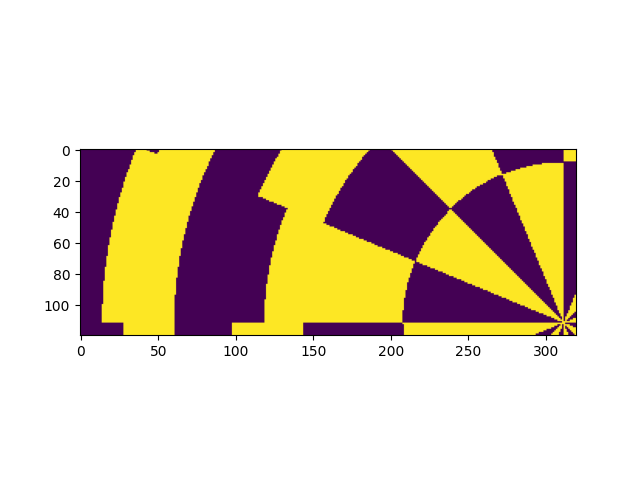

In [17]:
plt.imshow(aperture[400:520, 200:520])
plt.show()